## SVD
Математические модели обработки сигналов

Александр Янн

23.М20-ПУ


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Загрузка данных
digits = load_digits(n_class=10)
X, Y = digits.data, digits.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# SVD для снижения размерности X_train до d=11
svd = TruncatedSVD(n_components=11, random_state=42)
X_train_reduced = svd.fit_transform(X_train)

# Применение того же преобразования к X_test
X_test_reduced = svd.transform(X_test)

# Обучение классификатора kNN на исходных данных X_train по 5 ближайшим соседям
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

# Предсказание меток для X_test
Y_pred = knn.predict(X_test)

# Оценка качества классификатора на исходных данных X_test
accuracy_original = knn.score(X_test, Y_test)
print("Accuracy на исходных данных:", accuracy_original)

# Обучение классификатора kNN на данных с сниженной размерностью X_train_reduced аналогично прошлому
knn_reduced = KNeighborsClassifier(n_neighbors=5)
knn_reduced.fit(X_train_reduced, Y_train)
Y_pred_red = knn_reduced.predict(X_test_reduced)

# Оценка качества классификатора на данных с сниженной размерностью X_test_reduced
accuracy_reduced = knn_reduced.score(X_test_reduced, Y_test)
print("Accuracy на данных с сниженной размерностью:", accuracy_reduced)

Accuracy на исходных данных: 0.9833333333333333
Accuracy на данных с сниженной размерностью: 0.9777777777777777


In [74]:
print(f'Разница accuracy между изначальными данными и данными со сниженной размерностью:{accuracy_original-accuracy_reduced}')

Разница accuracy между изначальными данными и данными со сниженной размерностью:0.005555555555555536


Text(0.5, 1.0, 'Predict Label: 3)')

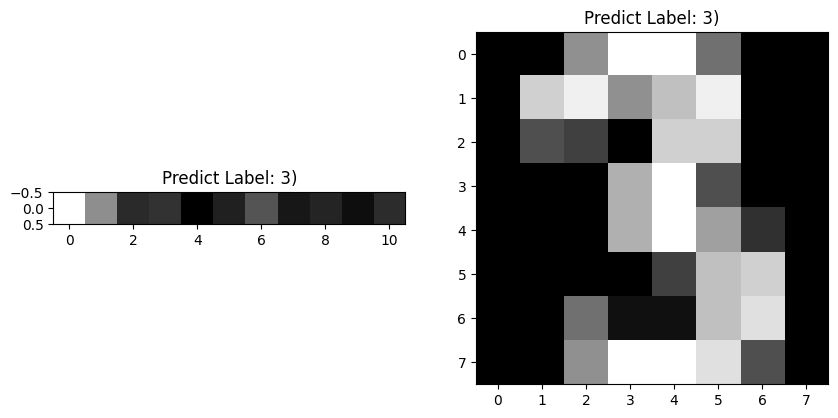

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(X_test_reduced[13].reshape(1,11), cmap='gray')
axes[0].set_title(f'Predict Label: {Y_pred[13]})')

axes[1].imshow(X_test[13].reshape(8, 8), cmap='gray')
axes[1].set_title(f'Predict Label: {Y_pred_red[13]})')
